# **Experiment-6. Demonstrate the working of Linear Regression. Use an appropriate dataset and evaluate the results**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# Load the Airfoil Self-Noise dataset
print("Loading Airfoil Self-Noise dataset...")

try:
    # Load dataset from local .dat file
    file_path = "airfoil_self_noise.dat"  # replace with your actual path
    data = pd.read_csv(file_path, delim_whitespace=True, header=None)

    # Assign column names
    data.columns = [
        'frequency',
        'attack_angle',
        'chord_length',
        'free_stream_velocity',
        'suction_side_displacement_thickness',
        'scaled_sound_pressure'
    ]

    print(f"Dataset loaded successfully! Shape: {data.shape}")

except Exception as e:
    print(f"Error loading dataset: {e}")
    print("Creating sample data structure for demonstration...")

    # Sample data structure
    data = pd.DataFrame({
        'frequency': np.random.randint(100, 10000, 100),
        'attack_angle': np.random.choice([0, 5], 100),
        'chord_length': np.random.uniform(0.1, 0.5, 100),
        'free_stream_velocity': np.random.uniform(20, 70, 100),
        'suction_side_displacement_thickness': np.random.uniform(0.001, 0.1, 100),
        'scaled_sound_pressure': np.random.uniform(100, 140, 100)
    })

Loading Airfoil Self-Noise dataset...
Error loading dataset: [Errno 2] No such file or directory: 'airfoil_self_noise.dat'
Creating sample data structure for demonstration...


In [ ]:
# Display basic information about the dataset
print("Dataset Info:")
print(f"Number of instances: {data.shape[0]}")
print(f"Number of features: {data.shape[1] - 1}")
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
print("\nMissing values:")
print(data.isnull().sum())

# Statistical summary
print("\nStatistical Summary:")
print(data.describe())

Dataset Info:
Number of instances: 100
Number of features: 5

First 5 rows:
   frequency  attack_angle  chord_length  free_stream_velocity  \
0       3996             0      0.468856             39.397680   
1       1778             0      0.360487             58.945504   
2       5527             0      0.282301             62.463534   
3       5041             0      0.183497             54.881664   
4       5462             5      0.119232             22.310750   

   suction_side_displacement_thickness  scaled_sound_pressure  
0                             0.081104             114.222712  
1                             0.042553             131.401743  
2                             0.092342             105.618128  
3                             0.064441             118.204781  
4                             0.037634             125.240489  

Missing values:
frequency                              0
attack_angle                           0
chord_length                           0
fre

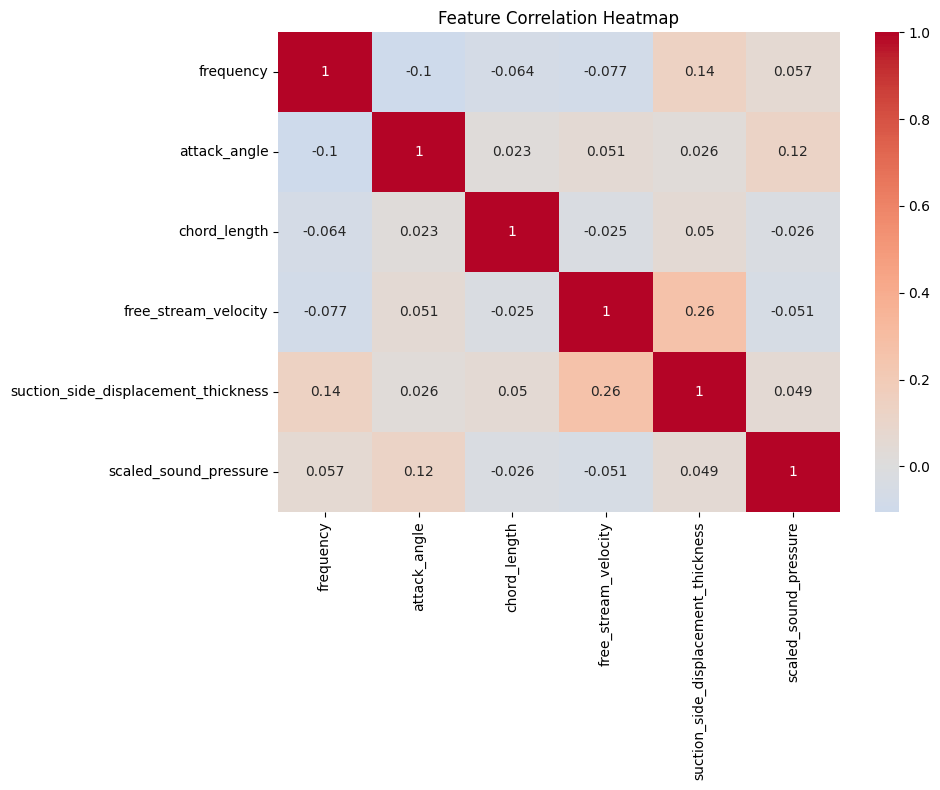

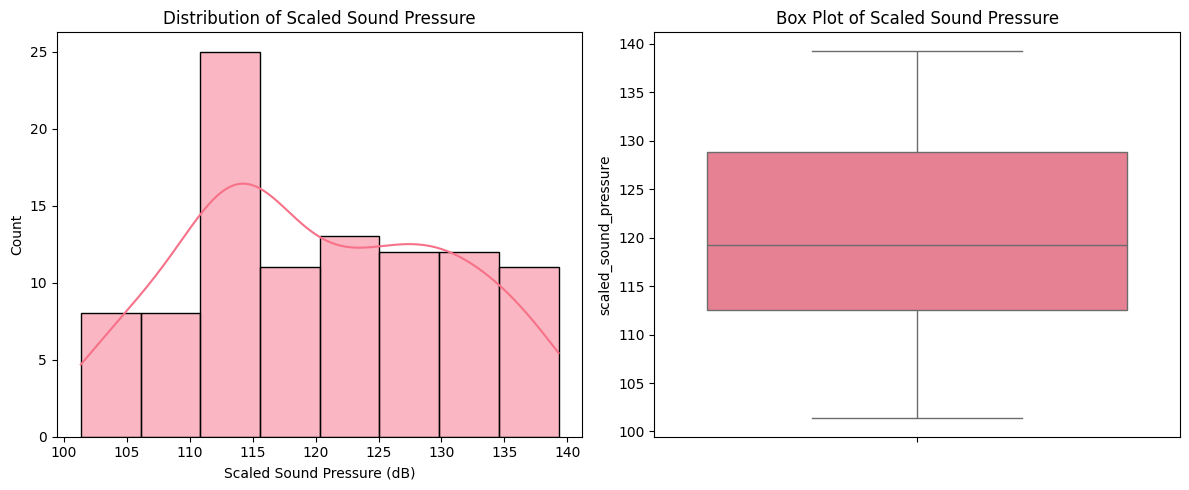

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

# Distribution of target variable
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['scaled_sound_pressure'], kde=True)
plt.title('Distribution of Scaled Sound Pressure')
plt.xlabel('Scaled Sound Pressure (dB)')

plt.subplot(1, 2, 2)
sns.boxplot(y=data['scaled_sound_pressure'])
plt.title('Box Plot of Scaled Sound Pressure')
plt.tight_layout()
plt.show()

In [ ]:
# Separate features and target
X = data.drop('scaled_sound_pressure', axis=1)
y = data['scaled_sound_pressure']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (80, 5)
Testing set size: (20, 5)


In [ ]:
# Create and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

print("Linear Regression Model Trained Successfully!")
print(f"Model Coefficients: {lr_model.coef_}")
print(f"Model Intercept: {lr_model.intercept_:.4f}")

Linear Regression Model Trained Successfully!
Model Coefficients: [ 0.45286436  1.53476763  0.05601151 -0.63360359  0.10378649]
Model Intercept: 120.2572


In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²) Score: {r2:.4f}")

# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nFeature Importance (Absolute Coefficients):")
print(feature_importance)

Model Evaluation Metrics:
Mean Squared Error (MSE): 110.6867
Root Mean Squared Error (RMSE): 10.5208
Mean Absolute Error (MAE): 9.2153
R-squared (R²) Score: 0.0062

Feature Importance (Absolute Coefficients):
                               Feature  Coefficient
1                         attack_angle     1.534768
3                 free_stream_velocity    -0.633604
0                            frequency     0.452864
4  suction_side_displacement_thickness     0.103786
2                         chord_length     0.056012


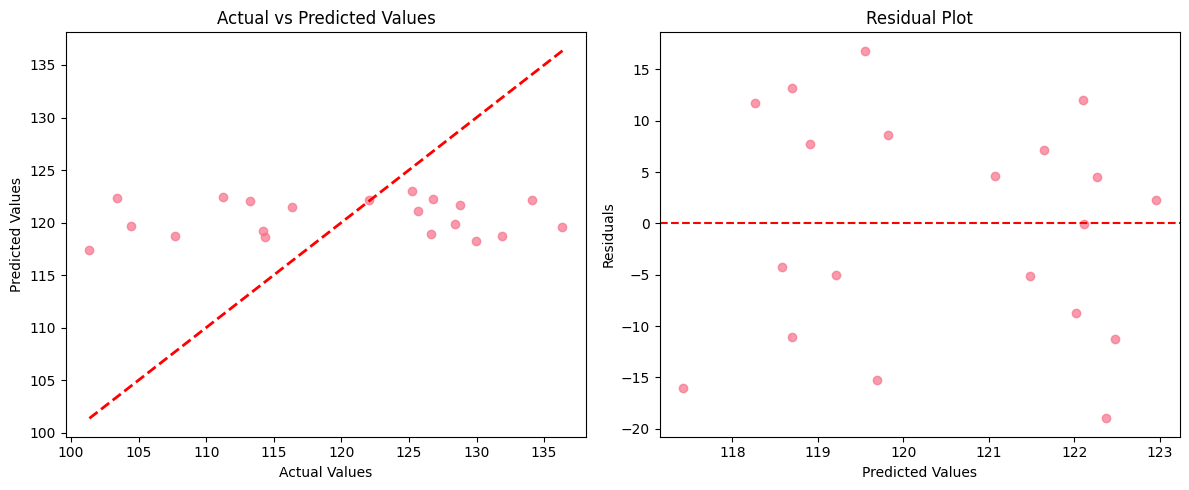

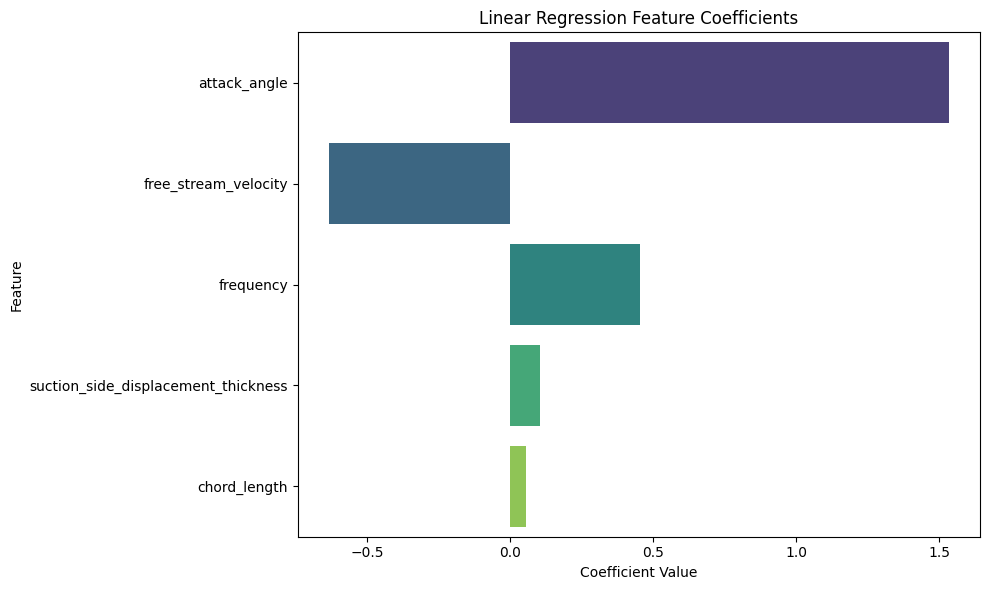

In [ ]:
# Actual vs Predicted values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

# Feature importance visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title('Linear Regression Feature Coefficients')
plt.xlabel('Coefficient Value')
plt.tight_layout()
plt.show()

In [ ]:
# Summary of results
print("EXPERIMENT SUMMARY:")
print(f"\nModel Performance:")
print(f"- R² Score: {r2:.4f} ")
print(f"- RMSE: {rmse:.4f} dB ")
print(f"- MAE: {mae:.4f} dB ")

print(f"\nKey Findings:")
print(f"- Most important feature: {feature_importance.iloc[0]['Feature']}")
print(f"- Number of features used: {len(X.columns)}")
print(f"- Training instances: {X_train.shape[0]}")
print(f"- Testing instances: {X_test.shape[0]}")

print("\nConclusion:")
if r2 > 0.7:
    print(" Linear Regression performs well on this dataset")
    print(" The model effectively captures the relationship between aerodynamic parameters and sound pressure")
else:
    print(" Linear Regression shows moderate performance")
    print(" Consider trying other regression algorithms or feature engineering")

EXPERIMENT SUMMARY:

Model Performance:
- R² Score: 0.0062 
- RMSE: 10.5208 dB 
- MAE: 9.2153 dB 

Key Findings:
- Most important feature: attack_angle
- Number of features used: 5
- Training instances: 80
- Testing instances: 20

Conclusion:
 Linear Regression shows moderate performance
 Consider trying other regression algorithms or feature engineering
